In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#Importing Input data
data_cohesion_load = np.load('Inputs/4ft_cohesion.npy')
#data_cohesion =  data_cohesion_load[:,0:234000]
data_friction_load = np.load('Inputs/4ft_friction.npy')
#data_friction = data_friction_load[:,0:234000]
data_poly_load = np.load('Inputs/4ft_poly_feature.npy')
#data_poly = data_poly_load[:,0:234000]
data_watertable_load = np.load('Inputs/4ft_water_table.npy')
#data_watertable = data_watertable_load[:,0:234000]
data_pos = np.load('Inputs/4ft_positions.npy')

In [3]:
n_x = 33
n_y =25
n_sim = len(data_cohesion_load[0,:])

In [4]:
n_sim

131072

In [5]:
coh_data = np.zeros((n_y,n_x,n_sim))
fric_data = np.zeros((n_y,n_x,n_sim))
poly_data = np.zeros((n_y,n_x,n_sim))
for j in range(n_sim):
    for i in range(n_y):
        coh_data[i,:,j] = data_cohesion_load[i,j]
        #coh_data[i,:,j] = coh_data[i,:,j] - np.min(coh_data[:,:,j])/(np.max(coh_data[:,:,j])-np.min(coh_data[:,:,j]))
        fric_data[i,:,j] = data_friction_load[i,j]
        poly_data[i,:,j] = data_poly_load[i,j]

In [6]:
#####
img1 = np.zeros((n_y,n_x,3,n_sim))
for j in range(n_sim):
    img1[:,:,0,j] = coh_data[:,:,j]
    img1[:,:,1,j] = fric_data[:,:,j]
    img1[:,:,2,j] = poly_data[:,:,j]

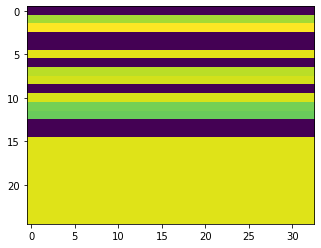

In [7]:
np.shape(img1)
plt.imshow(img1[:,:,1,11222])

In [8]:
# Data Normalization
for j in range(n_sim):
        coh_data[:,:,j] = (coh_data[:,:,j] - np.min(coh_data[:,:,j]))/(np.max(coh_data[:,:,j])-np.min(coh_data[:,:,j]))
        fric_data[:,:,j] = (fric_data[:,:,j] - np.min(fric_data[:,:,j]))/(np.max(fric_data[:,:,j])-np.min(fric_data[:,:,j]))
        poly_data[:,:,j] = (poly_data[:,:,j] - np.min(poly_data[:,:,j]))/(np.max(poly_data[:,:,j])-np.min(poly_data[:,:,j]))

C:\Users\SSinghai\AppData\Local\Temp\ipykernel_25340\3747044941.py:3: RuntimeWarning: invalid value encountered in true_divide
  coh_data[:,:,j] = (coh_data[:,:,j] - np.min(coh_data[:,:,j]))/(np.max(coh_data[:,:,j])-np.min(coh_data[:,:,j]))
C:\Users\SSinghai\AppData\Local\Temp\ipykernel_25340\3747044941.py:4: RuntimeWarning: invalid value encountered in true_divide
  fric_data[:,:,j] = (fric_data[:,:,j] - np.min(fric_data[:,:,j]))/(np.max(fric_data[:,:,j])-np.min(fric_data[:,:,j]))
C:\Users\SSinghai\AppData\Local\Temp\ipykernel_25340\3747044941.py:5: RuntimeWarning: invalid value encountered in true_divide
  poly_data[:,:,j] = (poly_data[:,:,j] - np.min(poly_data[:,:,j]))/(np.max(poly_data[:,:,j])-np.min(poly_data[:,:,j]))


In [9]:
img1 = np.zeros((n_y,n_x,3,n_sim))
for j in range(n_sim):
    img1[:,:,0,j] = coh_data[:,:,j]
    img1[:,:,1,j] = fric_data[:,:,j]
    img1[:,:,2,j] = poly_data[:,:,j]

In [10]:
##
new_img = np.zeros((n_sim,n_y,n_x,3))
for i in range(n_sim):
    new_img[i,:,:,:] = img1[:,:,:,i]

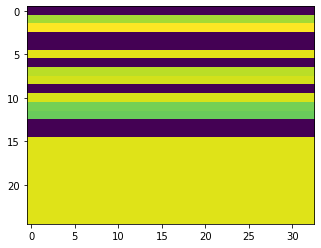

In [11]:
######
plt.imshow(new_img[11222,:,:,1])

In [12]:
x_dataset = new_img

In [13]:
np.shape(new_img)

(131072, 25, 33, 3)

In [14]:
data_failure_depth = np.load('Targets/4ft_failure_depths.npy')
data_velocity_plot = np.load('Targets/4ft_velocity_plots.npy')

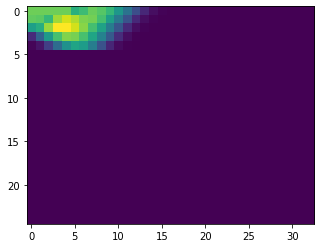

In [15]:
plt.imshow(data_velocity_plot[:,:,21])

In [16]:
velo = np.zeros((n_y,n_x,n_sim))
for j in range(n_sim):
    velo[:,:,j] = (data_velocity_plot[:,:,j] - np.min(data_velocity_plot[:,:,j]))/(np.max(data_velocity_plot[:,:,j])-np.min(data_velocity_plot[:,:,j]))

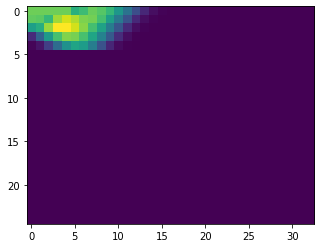

In [17]:
plt.imshow(velo[:,:,21])

In [18]:
vel_upd = []
for i in range(n_sim):
    temp = np.reshape(velo[:,:,j],(n_y*n_x,1))
    vel_upd.append(temp)

In [19]:
vel_upd  = np.squeeze(vel_upd)

In [20]:
np.shape(vel_upd[2])

(825,)

In [21]:
y_dataset = np.zeros((n_sim, (n_y*n_x)))
for i in range(n_sim):
    y_dataset[i,:] = vel_upd[i]


In [22]:
np.shape(y_dataset)

(131072, 825)

In [121]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_dataset,y_dataset, test_size=0.1, random_state = 2)

In [122]:
cnn = tf.keras.models.Sequential()

In [123]:
layer1 = cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu', input_shape=[n_y, n_x,3]))

In [124]:
layer2= cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [125]:
layer3= cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, activation='relu'))

In [126]:
layer4= cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
layer5=cnn.add(tf.keras.layers.Flatten())
layer6 = cnn.add(tf.keras.layers.BatchNormalization())

In [127]:
layer7=cnn.add(tf.keras.layers.Dense(units=2048, activation='relu'))
layer8 =  cnn.add(tf.keras.layers.BatchNormalization())
layer9=cnn.add(tf.keras.layers.Dense(units=2048, activation='relu'))
layer10 =  cnn.add(tf.keras.layers.BatchNormalization())
layer11=cnn.add(tf.keras.layers.Dense(units=1024, activation='relu'))
layer12=  cnn.add(tf.keras.layers.BatchNormalization())
layer13=cnn.add(tf.keras.layers.Dense(units = 825, activation='linear'))

In [128]:
def custom_loss(y_true, y_pred):
    w = tf.keras.losses.MeanSquaredError()
    w1 = 100000 * w(y_true,y_pred)
    return w1

In [129]:
cnn.compile(optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.00001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    name="Adam",
), loss=tf.keras.losses.MeanAbsoluteError())

In [130]:
cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 22, 30, 64)        3136      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 11, 15, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 12, 64)         65600     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 4, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1536)              0         
                                                                 
 batch_normalization_4 (Batc  (None, 1536)            

In [131]:
cnn.fit(x_train ,y_train, batch_size = 1000, epochs = 10)

Epoch 1/10
  9/118 [=>............................] - ETA: 1:07 - loss: nan   

KeyboardInterrupt: 

In [132]:
print(y_train)

[[0.99951352 0.9994869  0.99951968 ... 0.         0.         0.        ]
 [0.99951352 0.9994869  0.99951968 ... 0.         0.         0.        ]
 [0.99951352 0.9994869  0.99951968 ... 0.         0.         0.        ]
 ...
 [0.99951352 0.9994869  0.99951968 ... 0.         0.         0.        ]
 [0.99951352 0.9994869  0.99951968 ... 0.         0.         0.        ]
 [0.99951352 0.9994869  0.99951968 ... 0.         0.         0.        ]]


In [133]:
prediction = cnn.predict(x_test)

410/410 [==============================] - 10s 23ms/step


In [134]:
prediction

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

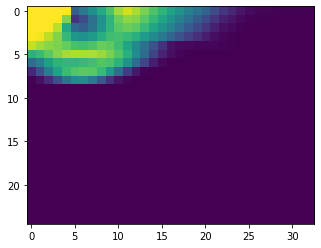

In [135]:
plt.imshow(np.reshape(y_test[1,:],(25,33)))

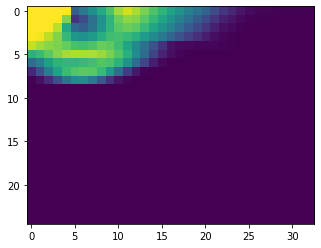

In [136]:
plt.imshow(y_train[1,:].reshape((25,33)))

In [137]:
df = pd.DataFrame({'CNN': prediction,'depth':y_test})

ValueError: Per-column arrays must each be 1-dimensional